In [1]:
# importing all required pakages and libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
import xgboost
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble.gradient_boosting import  GradientBoostingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
import warnings
warnings.filterwarnings('ignore')
sb.set()

d:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
ds = pd.read_csv('heart.csv')
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EDA and Data preprocessing

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Here we see no null values and all columns are numeric dtypes.

In [4]:
ds.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Here, we see target variable class is fairly balanced.

In [5]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here, most of the columns are descrete numeric and perhaps most of them has order within them. 

In [7]:
# here we are separating columns having unique value greater than 5 from the rest for seperate analysis.
numeric_col = []
numeric_cat_col = []
for col in ds.columns:
    if ds[col].value_counts().count() > 5:
        numeric_col.append(col)
    else:
        numeric_cat_col.append(col)
        
print('numeric_col: \n', numeric_col, '\n' )
print('numeric_cat_col: \n',numeric_cat_col,'\n')

numeric_col: 
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] 

numeric_cat_col: 
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'] 



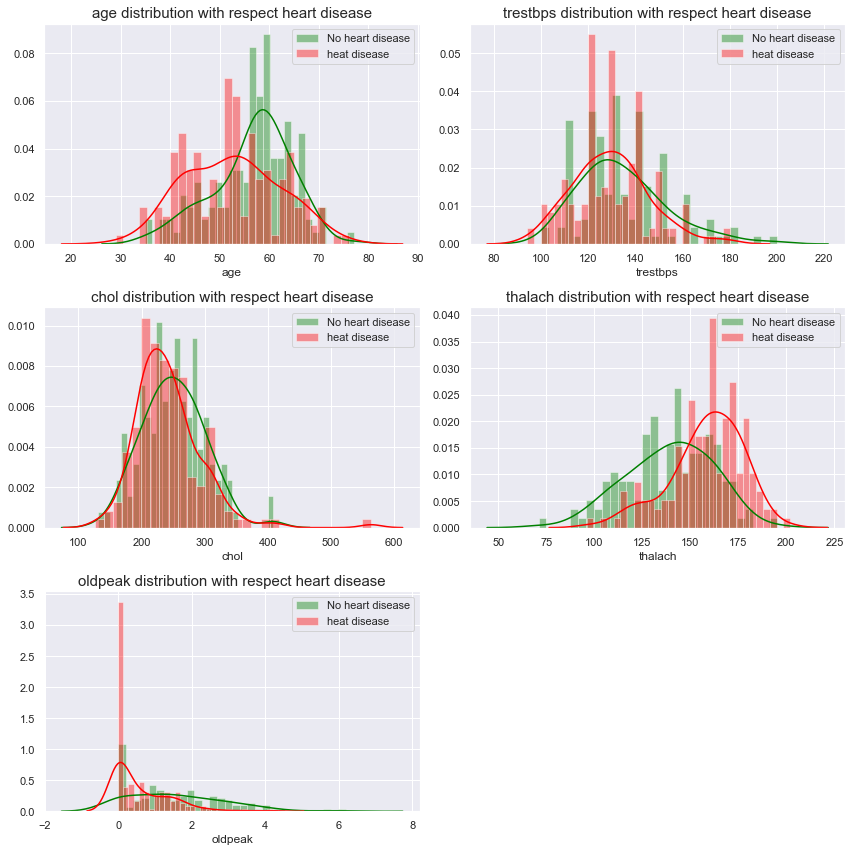

In [8]:
for i, col in enumerate(numeric_col):
    
    plt.subplot(3,2, i+1)

    sb.distplot(ds[col][ds['target'] == 0], kde = True, bins = 30 , color = 'green')
    sb.distplot(ds[col][ds['target'] == 1], kde = True, bins = 30, color = 'red')


    plt.legend(['No heart disease','heat disease'])

    plt.title(col+' distribution with respect heart disease', fontsize = 15)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

1. From above histogram/distplot plots, we can see that age between 50-55 has the higher chances of developing heart diseases.

2. Thalach (maximum heart rate achieved) range of between 150-180 has higher chances in indication of heart disease.

3. Oldpeak(ST depression induced by exercise relative to rest) value of between 0-2 indicates higher chances of heart disease.

4. Chol(cholesterol) range between 200-300 has higher chances for heart disease in patients.

5. Trestbps(resting blood pressure) having in the range 120-140 implies higher chances of heart disease among patients.

In [9]:
# Defining function to visualize descrete categorical variables.
def bar_chart(feature):
    yes = ds[ds.target == 1][feature].value_counts()
    no = ds[ds.target == 0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['heat disease','no heart disease']
    df.plot(kind = 'bar', stacked = False, figsize = (7,5))
    plt.xticks(rotation = 0)

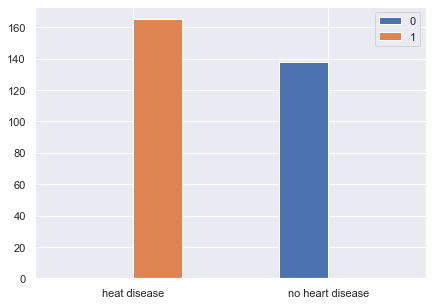

In [10]:
bar_chart('target')

Here, we see no. of heart disease cases are more.

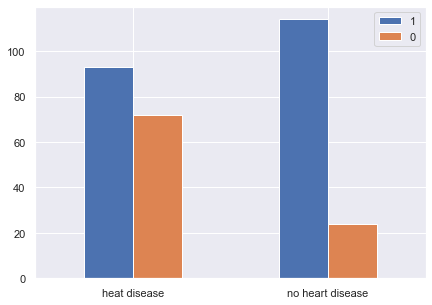

In [11]:
bar_chart('sex')

Here, we see male('1') patients have higher chances of developing heart disease then the female('0') patients.  

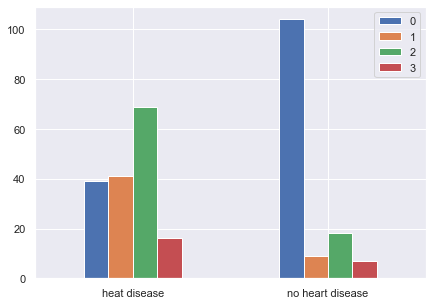

In [12]:
bar_chart('cp')

We see that different types of chest pain (cp) have different effect in heart disease. Particularly type 2 cases has higest number of heart disease. 

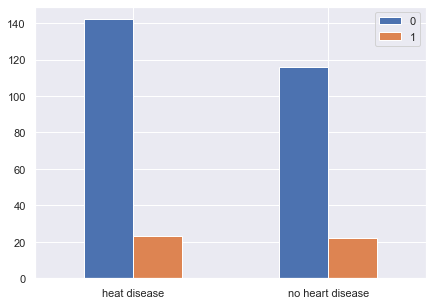

In [13]:
bar_chart('fbs')

fbs (fasting blood sugar) , where if fasting blood sugar > 120 mg/dl then true(1) else false(0).
Now fbs plays very important factor in determining heart disease, as more number of the patient diagnosed with fbs true has heart disease then those with fbs false. 

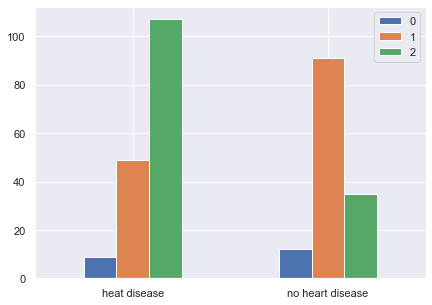

In [14]:
bar_chart('slope')

It can be seen that slope(the slope of the peak exercise ST segment) has its effect on heart disease. Where slope of type 2  plays an important role in determining the diseas.

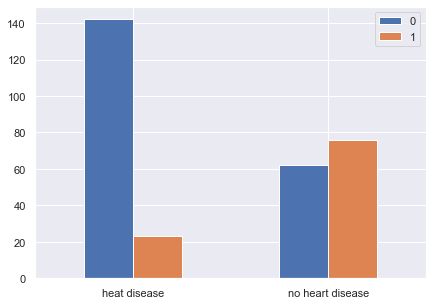

In [15]:
bar_chart('exang')

From above plot we see that exang (exercise induced angina) plays a vital role in heart disease, in which people having angina during exercises have serious indication of heart disease.

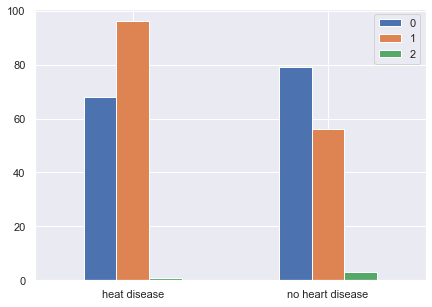

In [16]:
bar_chart('restecg')

We can see that restecg (resting electrocardiographic results) of result type 1 has more effect in determining whether a patient is having the disease or not. 

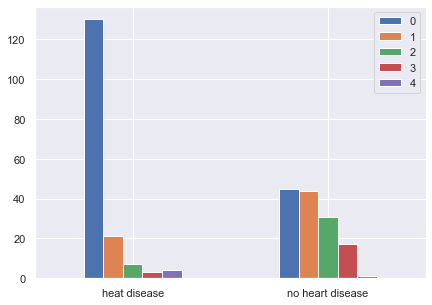

In [17]:
bar_chart('ca')

We see the type of  ca(number of major vessels colored by flourosopy) plays its role to some extend in  determining the disease, particularly the ca of type 0, where the number of heart patient is maximum.

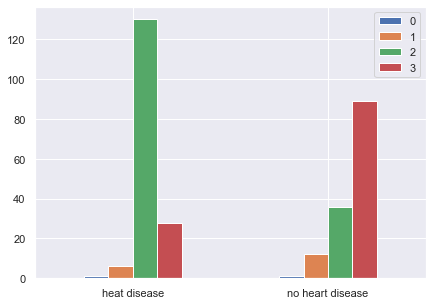

In [18]:
bar_chart('thal')

Here, the thal type  2 and 1 plays important role in determining the disease, as type 2 indicates higher probability  of  disease, whereas type 3 indicates lower probaility.

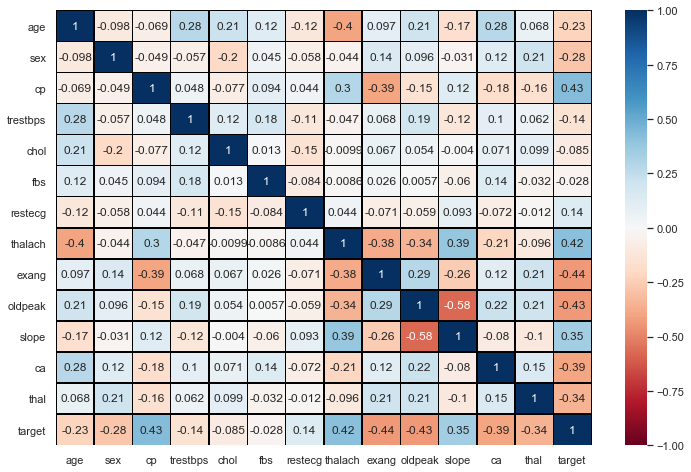

In [19]:
plt.figure(figsize = (12,8))
sb.heatmap(ds.corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)

From above correlation heatmap, we don't see much correlation between variables, however oldpeak and slope are the only most negatively correlated with value -0.58.

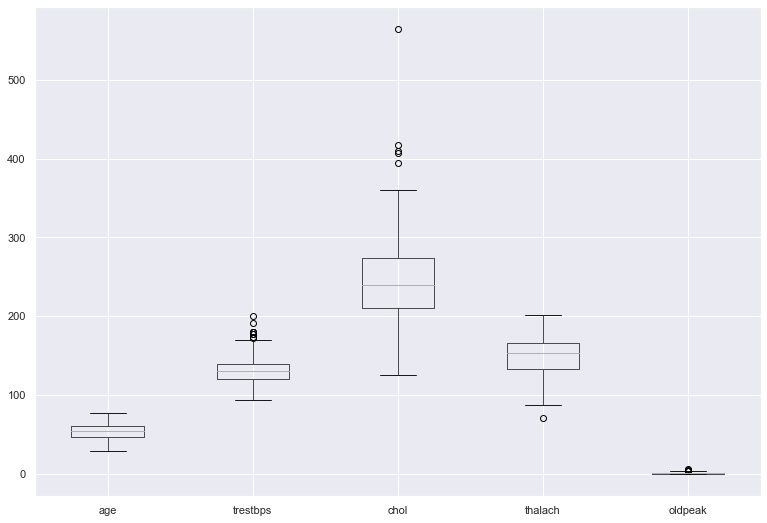

In [20]:
ds.boxplot(column = list(ds[numeric_col].columns), figsize = (13,9))

Here we see some outliers in data, and all features are in different scale with each other.

In [21]:
z = abs(zscore(ds[numeric_col]))
# here we are using z threshold as 3 to filter out outliers.
ds_new = ds[(z<3).all(axis = 1)]

In [22]:
print('no. of outliers removed:',ds.shape[0] - ds_new.shape[0])

no. of outliers removed: 9


In [23]:
# oultier-free data set
x = ds_new.drop('target', 1)
y = ds_new['target']

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
 x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,
                                                         test_size = 0.3)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2


In [27]:
# Here again, we are trying to tune the smoothing parameter using cross validation on training-set.
# for classification task.
# this is usually done to prevent the mean/target encoded data to overfit the training set. 

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.30, random_state = 42) 

numeric_cat_col.remove('target')
score_list = []
smoothing_list = np.arange(0,5,.125)
model  =   LogisticRegression() # using simple linearregression modle for tuning smoothing parameter.

for num in smoothing_list:
    x_train_en = x_train.copy()
    
    for col in numeric_cat_col:
        

        encoder =  ce.TargetEncoder(cols = col, smoothing = num)
        x_train_en[col] = encoder.fit_transform(x_train_en[col], y_train)
    score = cross_val_score(model, x_train_en, y_train, cv = 10, scoring = 'f1', n_jobs = -1 ).mean()
    score_list.append(score)
        
print('Optimum cross-val-score:',max(score_list),
      'corresponds to smoothing value of:',smoothing_list[score_list.index(max(score_list))])    

Optimum cross-val-score: 0.8494751625186409 corresponds to smoothing value of: 2.375


In [28]:
# splitting into train-test set.
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.30, random_state = 42) 


In [29]:
# target encoding features that are in target_encoding_list using tuned smoothing value as  2.375.
for col in numeric_cat_col:
    
        encoder =  ce.TargetEncoder(cols = col, smoothing =  2.375)
        x_train[col] = encoder.fit_transform(x_train[col], y_train)
        x_test[col] = encoder.transform(x_test[col])

In [30]:
# robust scaling features in numeric_col:
for col in numeric_col:
    
    scaler = RobustScaler()
    x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1,1))
    x_test[col] = scaler.transform(x_test[col].values.reshape(-1,1))

In [31]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
34,-0.307692,0.421429,0.646922,-0.25,-0.484375,0.531073,0.476190,-0.870968,0.223881,0.375,0.741935,0.325581,0.745614
9,0.153846,0.421429,0.758621,1.00,-1.187500,0.531073,0.591837,0.709677,0.681159,0.500,0.741935,0.705882,0.745614
148,-0.846154,0.421429,0.758621,-0.50,-0.281250,0.531073,0.591837,0.548387,0.681159,-0.500,0.741935,0.705882,0.745614
291,0.230769,0.421429,0.258065,-0.80,1.156250,0.531073,0.512564,-0.387097,0.681159,2.250,0.582835,0.215612,0.385550
269,0.076923,0.421429,0.258065,0.00,0.609375,0.535714,0.476190,-1.580645,0.223881,0.500,0.582835,0.705882,0.233766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,-0.615385,0.421429,0.258065,-1.00,0.484375,0.531073,0.476190,-1.096774,0.223881,0.125,0.330000,0.325581,0.745614
68,-0.846154,0.421429,0.810811,-0.50,-0.375000,0.531073,0.591837,0.580645,0.681159,-0.500,0.741935,0.705882,0.745614
205,-0.230769,0.421429,0.258065,-0.10,0.171875,0.531073,0.591837,0.290323,0.223881,-0.500,0.741935,0.325581,0.233766
167,0.538462,0.769231,0.258065,0.50,0.375000,0.531073,0.476190,0.258065,0.681159,1.750,0.582835,0.200014,0.745614


In [32]:
k =  KFold(n_splits = 10)

### Base Model Evaluation

model: RandomForestClassifier()
CV score:0.821895218166318
score_std: 0.06368812797380272
----------
model: LogisticRegression()
CV score:0.8509906489801218
score_std: 0.08380778106284699
----------
model: SVC()
CV score:0.8234711232900297
score_std: 0.054304919420368004
----------
model: AdaBoostClassifier()
CV score:0.7506752116282336
score_std: 0.06794678477820168
----------
model: GradientBoostingClassifier()
CV score:0.8048989898989898
score_std: 0.08751911678843075
----------
model: KNeighborsClassifier()
CV score:0.7918156300243415
score_std: 0.10081821994511768
----------
model: XGBClassifier(silent=True)
CV score:0.7935433657641223
score_std: 0.0660111629120557
----------
model: DecisionTreeClassifier()
CV score:0.7481204544248022
score_std: 0.10374512078075698
----------
model: GaussianNB()
CV score:0.8191043738869824
score_std: 0.0644076950672586
----------


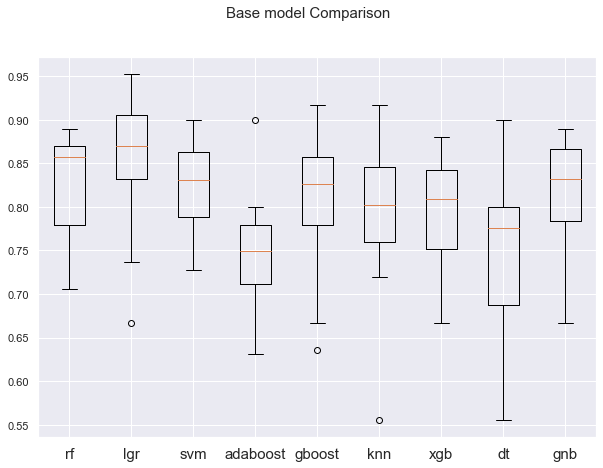

In [33]:
rf = RandomForestClassifier()
svm = SVC()
lgr = LogisticRegression()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier(silent = True)
dt = DecisionTreeClassifier()
gnb = GaussianNB()

models = [rf, lgr, svm, adaboost, gboost, knn, xgb, dt, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'f1', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rf', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb','dt','gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

Based on the above results of cross-val-score with respect to mean median and spread of score, we shall choose all models except the models - adaboost, knn and dt.

### Hyper-parameter tuning

In [34]:
param_svm = dict(kernel = ['rbf','poly','sigmoid','linear'], gamma = np.arange(0.25,3,0.25), 
                 degree = [2,3,4,5],
             C = np.logspace(4,-4,60))

param_gboost =  dict(
   learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
   max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [100, 150, 200],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2], random_state = [41,42,43])

param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ], alpha = [0.05,0.1,0.5,0.75,1,1.75,2],
                 reg_lambda = [0.05,0.1,0.5,0.75,1,1.75,2])

param_lgr = dict(penalty = ['l1','l2'],  C = np.logspace(4,-4,60), 
                 solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 max_iter = [100,150,200,250,300])


param_rf = dict(n_estimators = [10,15,20,25,30], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,8,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [41,42,43])

In [35]:
model_param_list = [(svm,param_svm) , ( gboost,param_gboost), ( xgb,param_xgb), (lgr,param_lgr),
                   (rf,param_rf)]

In [36]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_search = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'f1',
                                  random_state = 42)
    r_search.fit( x_train, y_train.values.ravel())
    best_cvscore = r_search.best_score_
    best_param = r_search.best_params_
    best_estimator = r_search.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: SVC()
best_cvscore: 0.8497341509240824
best_param: {'kernel': 'linear', 'gamma': 2.75, 'degree': 3, 'C': 1.1689518164985777}


model: GradientBoostingClassifier()
best_cvscore: 0.7964473740774259
best_param: {'random_state': 43, 'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 15, 'learning_rate': 0.1}


model: XGBClassifier(silent=True)
best_cvscore: 0.8282284449830088
best_param: {'reg_lambda': 1, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.3, 'alpha': 1}


model: LogisticRegression()
best_cvscore: 0.8465107290171229
best_param: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 4.075392965871778}


model: RandomForestClassifier()
best_cvscore: 0.8180016434112545
best_param: {'random_state': 41, 'n_estimators': 25, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 3, 'criterion': 'entropy'}


best_estimators: [SVC(C=1.1689518164985777, gamma=2.75, kernel='linear'), GradientBo

### Testing

In [37]:
best_estimator_list.append(gnb)

In [38]:
print('*******TRAIN RESULT*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_train)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy:',round(score*100,2),'%','\n')
    print('auc_roc_score:', round(roc_auc_score(y_train,y_pred)*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_train, y_pred))
    print('\n')

*******TRAIN RESULT*******


model SVC(C=1.1689518164985777, gamma=2.75, kernel='linear')
accuracy: 85.85 % 

auc_roc_score: 85.58 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        96
           1       0.84      0.90      0.87       109

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



model GradientBoostingClassifier(max_depth=15, min_samples_leaf=2,
                           min_samples_split=3, n_estimators=150,
                           random_state=43)
accuracy: 100.0 % 

auc_roc_score: 100.0 % 

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       109

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00   

In [39]:
print('*******TEST RESULT********')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    print('Model:',model,'\n')
    print('accuracy:',round(score*100,2),'%','\n')
    print('confusion_matrix:','\n',confusion_matrix(y_test,y_pred),'\n')
    print('auc_roc_score:', round(roc_auc_score(y_test,y_pred)*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TEST RESULT********


Model: SVC(C=1.1689518164985777, gamma=2.75, kernel='linear') 

accuracy: 88.76 % 

confusion_matrix: 
 [[31  4]
 [ 6 48]] 

auc_roc_score: 88.73 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.92      0.89      0.91        54

    accuracy                           0.89        89
   macro avg       0.88      0.89      0.88        89
weighted avg       0.89      0.89      0.89        89

------------------------------------------------------------------------------


Model: GradientBoostingClassifier(max_depth=15, min_samples_leaf=2,
                           min_samples_split=3, n_estimators=150,
                           random_state=43) 

accuracy: 83.15 % 

confusion_matrix: 
 [[29  6]
 [ 9 45]] 

auc_roc_score: 83.1 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.83      0.79

From train and test data result, we can see that GradientBoost model overfitted the training set, but failed to generalise well on the test set as compared to other models.

Whereas, GaussianNB model performed better on the unseen/test data compared to other models based on the accuracy and roc_auc_score, and thus, giving us the confidence to select it as our classifier in this  project. 

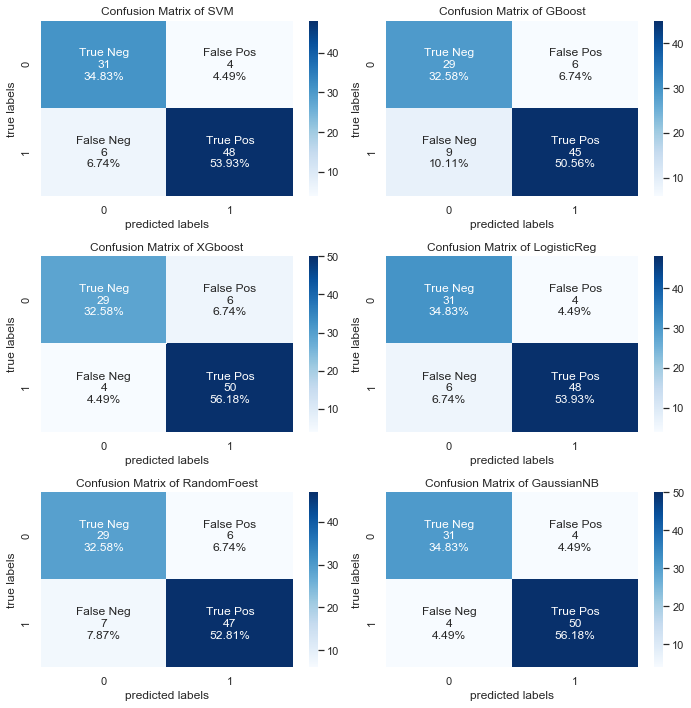

In [40]:
# visualizing confusion matrix  with the help of heatmaps.
model_index = [0,1,2,3,4,5]
model = ['SVM','GBoost','XGboost','LogisticReg','RandomFoest','GaussianNB']

for index ,model, model_name in zip(model_index,best_estimator_list,model):
    plt.subplot(3,2, index + 1 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    c_matric = confusion_matrix(y_test, y_pred)
    groups = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                c_matric.flatten()]
    group_percent = ['{0:.2%}'.format(value) for value in
                     c_matric.flatten()/np.sum(c_matric)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(groups,group_counts,group_percent)]
    labels = np.asarray(labels).reshape(2,2)
    sb.heatmap(c_matric, annot=labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix of ' + model_name)
    plt.ylabel('true labels')
    plt.xlabel('predicted labels')
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

After, analysing the above heatmaps, we see that XGboost and GaussianNB model have the highest 'True Positives' and we see that 'type-II' errors of these models are also the lowest, which is very crucial in avoiding the condition like - a patient having heart disease to falsely classify as not having the disease. 

In [41]:
# selecting the best performing model for classifiaction.
selected_model = GaussianNB() 
selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

In [42]:
test_df = pd.DataFrame({'Actual':y_test.values,'Predicted':y_pred})

In [43]:
test_df.to_csv('heart_disease_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [44]:
# Saving the final model as GuassianNB.
import joblib

joblib.dump(selected_model, 'heart_disease_pred.obj')
print('Model successfully saved.')

Model successfully saved.
